Seppo: ANALYSING CLEAN DATASET, CONTENT:

1. Input file. general analysis
2. Remove unnessesary indexes and low volume-, NaN- and redundant stations, general exploratory analysis (volmes, spread)
3. Three years total view. Per station lineplot on volumes and stddeviation. Barplot on volumes 
4. Look at the figures by hour. Per hour volumes (table, lineplot). Per hour spread (boxplot, table). Stddeviation
5. Impact of Air Temperature on volumes and stddeviation
6. Impact of weekday
7. Impact of snow depth
8. Pairplots
9. Extra

In [155]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merged and somewhat cleaned combined dataset on hour level of Helsinki Cyclists per measurement station and weather data
df = pd.read_csv('HkiCyclistsandWeather_2016_2018_cleaned_ver20200324.csv')


In [156]:
df.head()

,Unnamed: 0,level_0,index,Date,Time,Weekday,RelativeHumidity(%),AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),...,Kuusisaarentie,Lauttasaarin bridge south side,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Ratapihantie,Baana
0,0,0,0,2016-01-01,00:00,Fri,81.0,-3.5,0.0,4.3,...,1.0,4.0,2.0,3.0,2.0,11.0,7.0,11.0,2.0,6.0
1,1,1,1,2016-01-01,01:00,Fri,78.0,-3.5,0.0,4.1,...,0.0,0.0,1.0,0.0,1.0,1.0,4.0,6.0,10.0,5.0
2,2,2,2,2016-01-01,02:00,Fri,78.0,-3.3,0.0,5.0,...,0.0,5.0,2.0,1.0,3.0,6.0,6.0,12.0,2.0,5.0
3,3,3,3,2016-01-01,03:00,Fri,78.0,-3.0,0.0,3.9,...,1.0,2.0,1.0,0.0,1.0,4.0,4.0,3.0,7.0,3.0
4,4,4,4,2016-01-01,04:00,Fri,76.0,-3.5,0.0,3.4,...,1.0,3.0,3.0,2.0,2.0,6.0,2.0,11.0,1.0,3.0


In [157]:
df.columns

Index(['Unnamed: 0', 'level_0', 'index', 'Date', 'Time', 'Weekday',
       'RelativeHumidity(%)', 'AirTemperature(degC)', 'SnowDepth(cm)',
       'WindSpeed(m/s)', 'WindDirection(deg)', 'Etelaesplanadi',
       'Huopalahti (station)', 'Kaisaniemi/Elaintarhanlahti',
       'Kulosaari bridge south', 'Kulosaaren silta po. ', 'Kuusisaarentie',
       'Lauttasaarin bridge south side', 'Merikannontie',
       'Munkkiniemi bridge south side', 'Munkkiniemi bridge north side',
       'Heperia park/Ooppera', 'Pitkasilta itapuoli', 'Pitkasilta west side',
       'Ratapihantie', 'Baana'],
      dtype='object')

# 2. Remove unnessesary indexes and low volume-, NaN- and redundant stations

In [158]:
df = df.drop(["Unnamed: 0","level_0", "index", "Etelaesplanadi", "Kulosaari bridge south", "Munkkiniemi bridge north side", "Pitkasilta west side"],axis=1)
df.columns = ['Date', 'Time', 'Weekday',
       'RelativeHumidity(%)', 'AirTemperature(degC)', 'SnowDepth(cm)',
       'WindSpeed(m/s)', 'WindDirection(deg)', 
       'Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge_north', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_south',
       'Heperia_park/Opera', 'Pitkasilta_east',
       'Ratapihantie', 'Baana']
#remove last row (year 2019)
df = df.drop(df.index[26304])
df.tail()

,Date,Time,Weekday,RelativeHumidity(%),AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg),Huopalahti,Kaisaniemi/Elaintarha,Kulosaari_bridge_north,Kuusisaarentie,Lauttasaari_bridge,Merikannontie,Munkkiniemi_south,Heperia_park/Opera,Pitkasilta_east,Ratapihantie,Baana
26299,2018-12-31,19:00,Mon,85.0,0.9,0.0,8.6,209.0,8.0,3.0,5.0,8.0,6.0,6.0,8.0,12.0,4.0,4.0,2.0
26300,2018-12-31,20:00,Mon,91.0,1.0,0.0,8.8,207.0,4.0,1.0,4.0,6.0,14.0,2.0,3.0,11.0,6.0,7.0,9.0
26301,2018-12-31,21:00,Mon,88.0,1.3,0.0,9.5,207.0,1.0,2.0,4.0,1.0,1.0,7.0,5.0,5.0,1.0,10.0,5.0
26302,2018-12-31,22:00,Mon,95.0,0.8,0.0,7.6,200.0,3.0,2.0,3.0,0.0,1.0,0.0,0.0,7.0,5.0,8.0,7.0
26303,2018-12-31,23:00,Mon,95.0,1.1,2.0,8.6,204.0,1.0,3.0,2.0,3.0,9.0,0.0,1.0,7.0,5.0,1.0,2.0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26304 entries, 0 to 26303
Data columns (total 19 columns):
Date                      26304 non-null object
Time                      26304 non-null object
Weekday                   26304 non-null object
RelativeHumidity(%)       26273 non-null float64
AirTemperature(degC)      26302 non-null float64
SnowDepth(cm)             26304 non-null float64
WindSpeed(m/s)            26068 non-null float64
WindDirection(deg)        26069 non-null float64
Huopalahti                26304 non-null float64
Kaisaniemi/Elaintarha     26304 non-null float64
Kulosaari_bridge_north    26304 non-null float64
Kuusisaarentie            26304 non-null float64
Lauttasaari_bridge        26304 non-null float64
Merikannontie             26304 non-null float64
Munkkiniemi_south         26304 non-null float64
Heperia_park/Opera        26304 non-null float64
Pitkasilta_east           26304 non-null float64
Ratapihantie              26304 non-null float64
Baana       

In [160]:
df.describe()

,RelativeHumidity(%),AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg),Huopalahti,Kaisaniemi/Elaintarha,Kulosaari_bridge_north,Kuusisaarentie,Lauttasaari_bridge,Merikannontie,Munkkiniemi_south,Heperia_park/Opera,Pitkasilta_east,Ratapihantie,Baana
count,26273.000000,26302.000000,26304.000000,26068.000000,26069.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,78.843528,6.890404,1.609565,3.491511,201.140857,47.091735,47.609907,61.117092,44.514713,92.838998,76.669632,46.350555,103.557330,72.580026,49.951262,101.274293
std,15.633433,8.726058,5.309979,1.575584,100.702340,73.634712,65.554367,85.079289,68.011190,119.252479,106.428303,68.867400,144.560935,93.977022,73.500443,136.121898
min,19.000000,-23.800000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,0.700000,-1.000000,2.400000,117.000000,4.000000,4.000000,7.000000,3.000000,9.000000,5.000000,4.000000,10.000000,8.000000,6.000000,10.000000
50%,83.000000,6.000000,0.000000,3.300000,222.000000,18.000000,20.000000,25.000000,15.000000,42.000000,28.000000,17.000000,41.000000,32.000000,22.000000,41.000000
75%,91.000000,14.300000,0.000000,4.400000,283.000000,57.000000,67.000000,83.000000,58.250000,136.000000,107.000000,61.000000,143.000000,104.000000,61.000000,146.000000
max,100.000000,30.200000,23.000000,12.400000,360.000000,688.000000,504.000000,780.000000,546.000000,950.000000,731.000000,498.000000,1153.000000,678.000000,655.000000,863.000000


In [161]:
# compare stddeviations, it seems to be normalized
df.std()
# biggest differences: Hesperia, Baana and Kaisaniemi, Kuusisaarentie

RelativeHumidity(%)        15.633433
AirTemperature(degC)        8.726058
SnowDepth(cm)               5.309979
WindSpeed(m/s)              1.575584
WindDirection(deg)        100.702340
Huopalahti                 73.634712
Kaisaniemi/Elaintarha      65.554367
Kulosaari_bridge_north     85.079289
Kuusisaarentie             68.011190
Lauttasaari_bridge        119.252479
Merikannontie             106.428303
Munkkiniemi_south          68.867400
Heperia_park/Opera        144.560935
Pitkasilta_east            93.977022
Ratapihantie               73.500443
Baana                     136.121898
dtype: float64

# 3. Three years total view - in two parts (clarity)

In [162]:
df.Date=pd.to_datetime(df.Date,format='%Y-%m-%d')

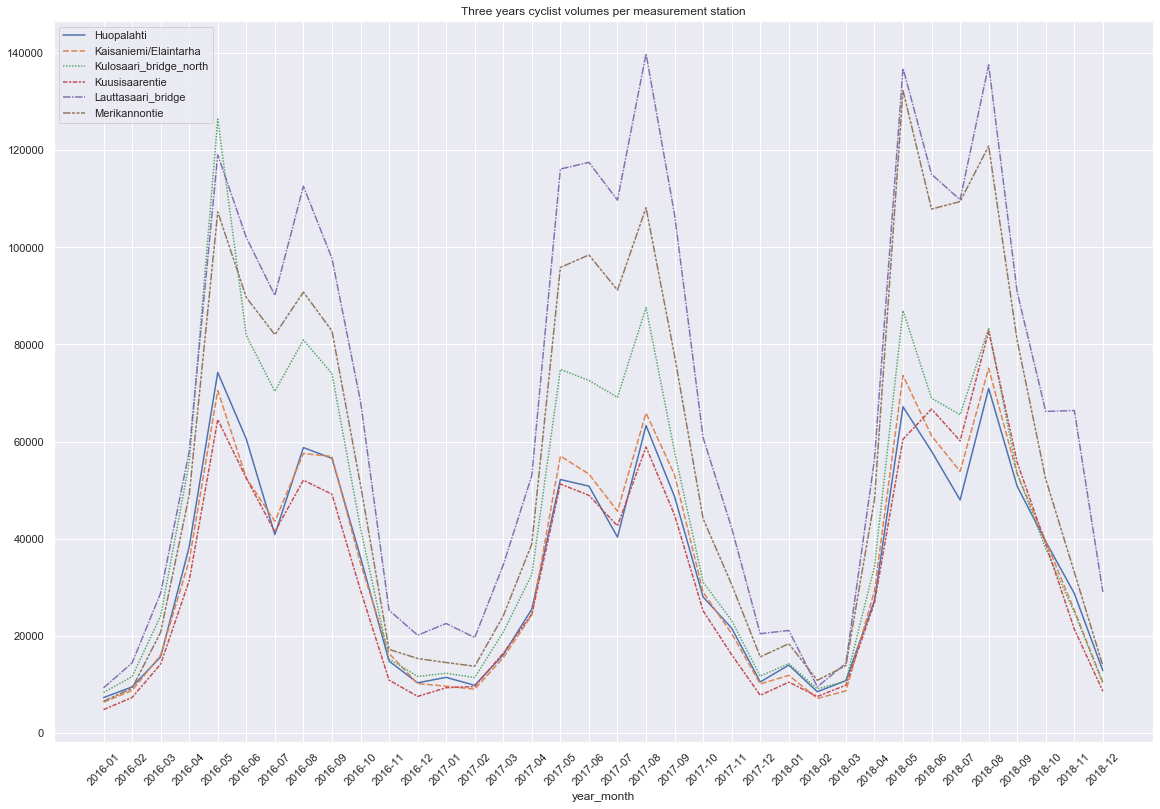

In [163]:
df['year_month'] = pd.to_datetime(df['Date']).dt.to_period('M')
toplot = df[['year_month','Huopalahti', 'Kaisaniemi/Elaintarha','Kulosaari_bridge_north', 'Kuusisaarentie','Lauttasaari_bridge', 'Merikannontie',]]
toplot = toplot.groupby(['year_month']).sum()
toplot.index=toplot.index.to_series().astype(str)
#toplot.info()
#toplot.head()
sns.set(rc={'figure.figsize':(19.7,13.27)})
plt.xticks(rotation=45)
plt.title("Three years cyclist volumes per measurement station")
sns.lineplot(data=toplot)

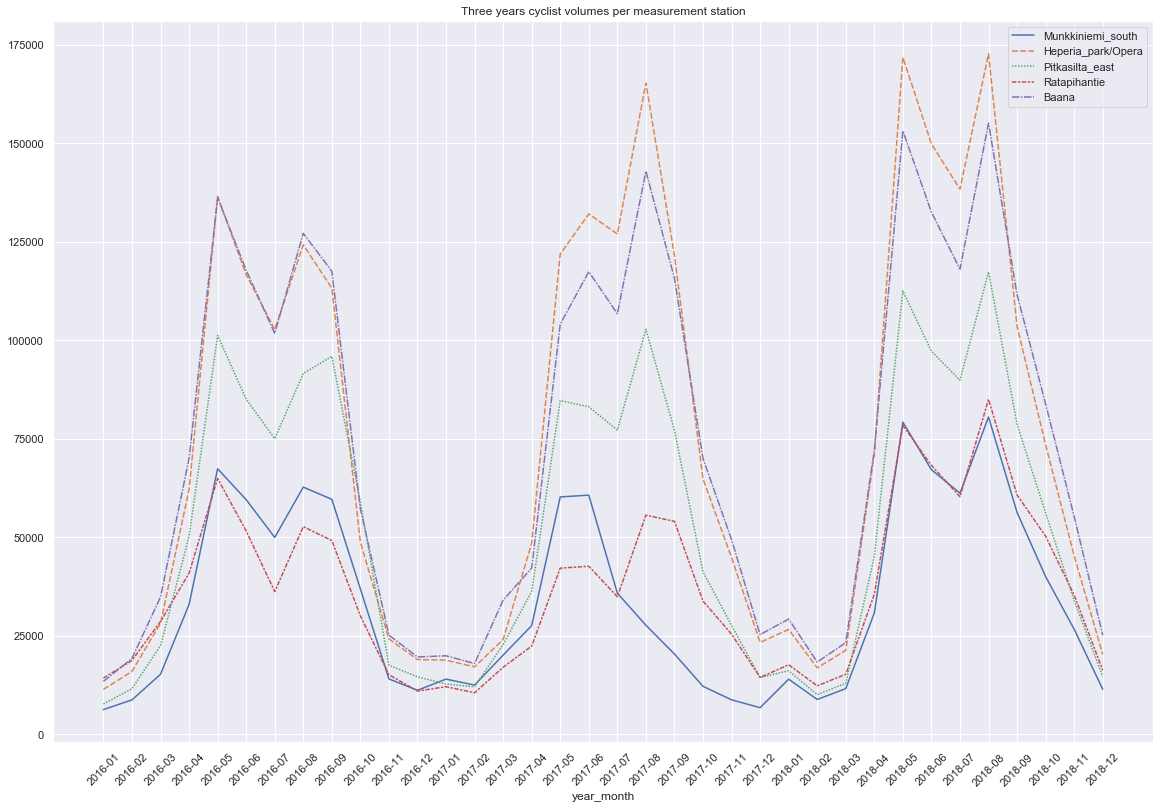

In [164]:
toplot = df[['year_month','Munkkiniemi_south','Heperia_park/Opera', 'Pitkasilta_east','Ratapihantie', 'Baana']]
toplot = toplot.groupby(['year_month']).sum()
toplot.index=toplot.index.to_series().astype(str)
#toplot.info()
#toplot.head()
sns.set(rc={'figure.figsize':(19.7,13.27)})
plt.xticks(rotation=45)
plt.title("Three years cyclist volumes per measurement station")
sns.lineplot(data=toplot)

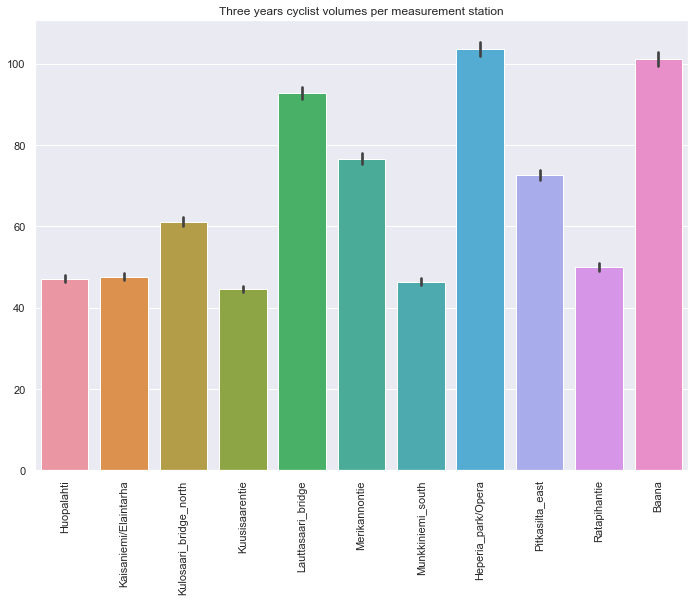

In [165]:
dfc = df[['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge_north', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_south',
       'Heperia_park/Opera', 'Pitkasilta_east',
       'Ratapihantie', 'Baana']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=90)
plt.title("Three years cyclist volumes per measurement station")
sns.barplot(data=dfc)

# 4. Look at the figures by hour

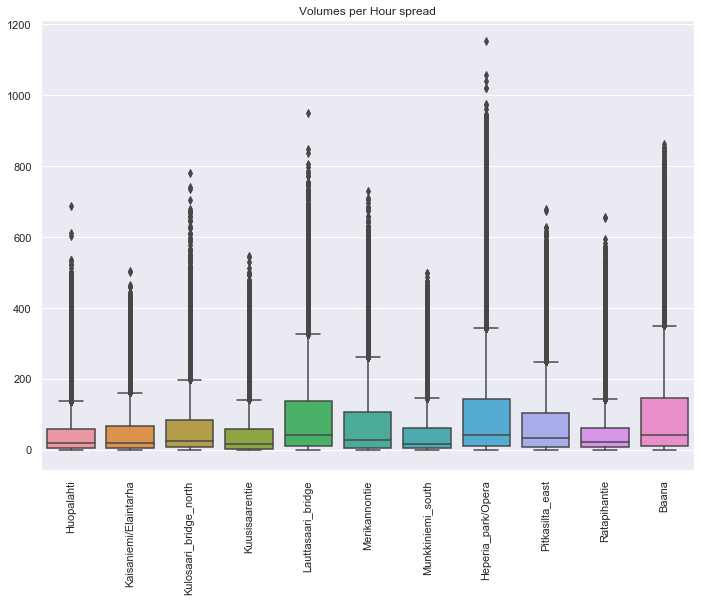

In [166]:
plt.title("Volumes per Hour spread")
plt.xticks(rotation=90)
sns.boxplot(data = dfc)

In [167]:
# group by hour and analyse the differences in 4
timegroup = df.groupby('Time').sum()
'''timegroup1 = timegroup[['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge_north', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_south',
       'Heperia_park/Opera', 'Pitkasilta_east',
       'Ratapihantie', 'Baana']]'''
timegroup

,RelativeHumidity(%),AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg),Huopalahti,Kaisaniemi/Elaintarha,Kulosaari_bridge_north,Kuusisaarentie,Lauttasaari_bridge,Merikannontie,Munkkiniemi_south,Heperia_park/Opera,Pitkasilta_east,Ratapihantie,Baana
Time,,,,,,,,,,,,,,,,
00:00,92766.0,6050.2,1800.0,3457.8,220398.0,4092.0,7416.0,11202.0,3357.0,16047.0,6730.0,5366.0,17667.0,18587.0,6351.0,14366.0
01:00,93563.0,5873.3,1759.0,3412.3,219220.0,2596.0,4166.0,6686.0,1887.0,9278.0,3462.0,2934.0,10206.0,12090.0,3629.0,8508.0
02:00,94162.0,5740.7,1762.0,3420.2,219422.0,1971.0,2739.0,4301.0,1111.0,6900.0,1966.0,2050.0,6854.0,8393.0,2361.0,5373.0
03:00,94348.0,5765.6,1770.0,3464.6,224098.0,1312.0,2168.0,3639.0,844.0,4088.0,1554.0,1329.0,4362.0,5596.0,1722.0,3350.0
04:00,92929.0,6108.8,1780.0,3481.7,219345.0,4974.0,2168.0,5924.0,1437.0,4187.0,1697.0,1856.0,4183.0,5247.0,4243.0,5011.0
05:00,90717.0,6604.3,1786.0,3615.1,215820.0,15622.0,4819.0,15371.0,5657.0,14821.0,7986.0,6324.0,9282.0,8712.0,15532.0,17689.0
06:00,88062.0,7129.2,1783.0,3737.0,212432.0,65955.0,25151.0,71512.0,35166.0,57614.0,52451.0,44753.0,48352.0,32430.0,69117.0,73724.0
07:00,85909.0,7678.4,1783.0,3835.3,209988.0,148905.0,76152.0,140760.0,111074.0,157178.0,154312.0,119948.0,136847.0,79976.0,149504.0,183170.0
08:00,84242.0,8123.3,1787.0,3989.5,211906.0,145788.0,132503.0,161452.0,133377.0,247489.0,174223.0,128991.0,272128.0,153330.0,163863.0,292056.0


In [168]:
timegroup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 00:00 to 23:00
Data columns (total 16 columns):
RelativeHumidity(%)       24 non-null float64
AirTemperature(degC)      24 non-null float64
SnowDepth(cm)             24 non-null float64
WindSpeed(m/s)            24 non-null float64
WindDirection(deg)        24 non-null float64
Huopalahti                24 non-null float64
Kaisaniemi/Elaintarha     24 non-null float64
Kulosaari_bridge_north    24 non-null float64
Kuusisaarentie            24 non-null float64
Lauttasaari_bridge        24 non-null float64
Merikannontie             24 non-null float64
Munkkiniemi_south         24 non-null float64
Heperia_park/Opera        24 non-null float64
Pitkasilta_east           24 non-null float64
Ratapihantie              24 non-null float64
Baana                     24 non-null float64
dtypes: float64(16)
memory usage: 3.2+ KB


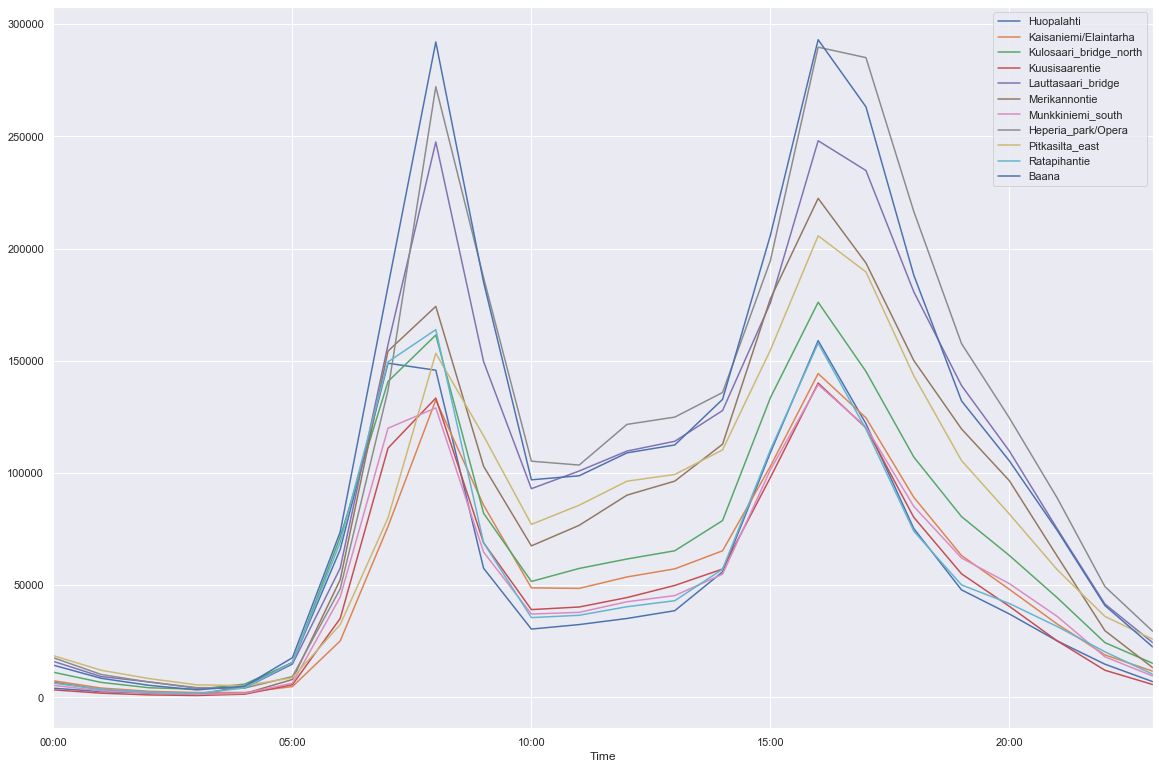

In [169]:
sns.set(rc={'figure.figsize':(19.7,13.27)})
timegroup.reset_index().plot(x='Time', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge_north', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_south',
       'Heperia_park/Opera', 'Pitkasilta_east',
       'Ratapihantie', 'Baana']))


# Hourly STD deviations

In [170]:
# stddeviations
timegroup_std = df.groupby('Time').std()
timegroup_std = timegroup_std[['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge_north', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_south',
       'Heperia_park/Opera', 'Pitkasilta_east',
       'Ratapihantie', 'Baana']]
timegroup_std

,Huopalahti,Kaisaniemi/Elaintarha,Kulosaari_bridge_north,Kuusisaarentie,Lauttasaari_bridge,Merikannontie,Munkkiniemi_south,Heperia_park/Opera,Pitkasilta_east,Ratapihantie,Baana
Time,,,,,,,,,,,
00:00,4.407155,7.661217,18.073785,3.654066,18.225229,8.578105,6.859859,19.061001,23.208233,5.390064,15.627727
01:00,3.261661,4.853529,9.074374,2.206285,11.869791,4.672701,4.255285,12.737794,19.887054,4.202946,11.065448
02:00,2.319746,3.696969,5.992134,1.670260,8.998540,2.937616,3.204677,9.499122,12.684031,2.807514,7.604286
03:00,1.586884,2.936695,3.962679,1.222341,5.919865,2.350286,2.164358,6.416414,7.895882,2.635627,4.504741
04:00,3.464153,2.434057,3.659245,1.516697,4.533950,1.813556,2.023829,4.653485,5.728680,2.766542,4.156121
05:00,12.322956,4.190482,13.182330,5.478094,9.797280,6.852126,9.488472,6.747565,6.663411,10.832125,12.485229
06:00,56.669049,19.599088,64.377713,33.990624,46.760880,45.459988,43.839334,41.366665,28.197724,55.984250,62.577588
07:00,134.139225,69.610224,130.321341,107.705363,136.653972,133.446660,110.454785,127.747903,78.114078,127.440196,160.675977
08:00,128.232301,117.408600,146.598282,120.873913,215.616241,154.816113,118.823438,254.212719,144.017176,140.161544,246.831766


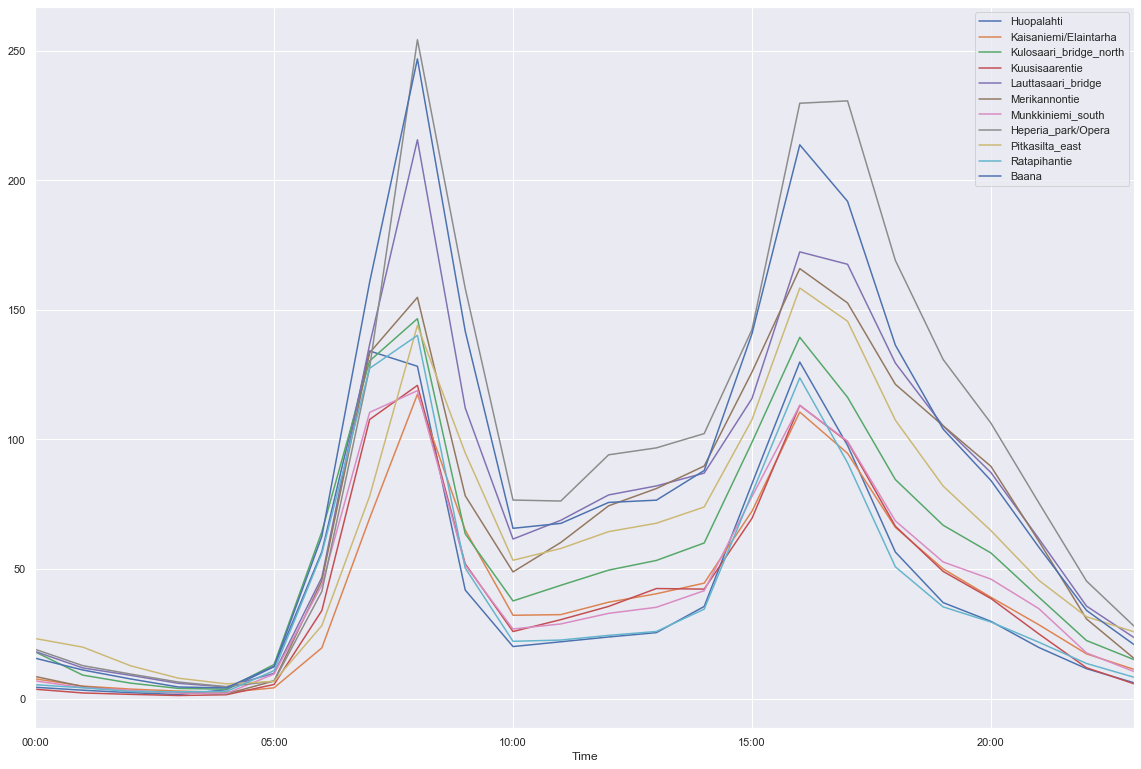

In [171]:
sns.set(rc={'figure.figsize':(19.7,13.27)})
timegroup_std.reset_index().plot(x='Time', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge_north', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_south',
       'Heperia_park/Opera', 'Pitkasilta_east',
       'Ratapihantie', 'Baana']))

# 5. Impact of Air Temperature

C:\Users\seppo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


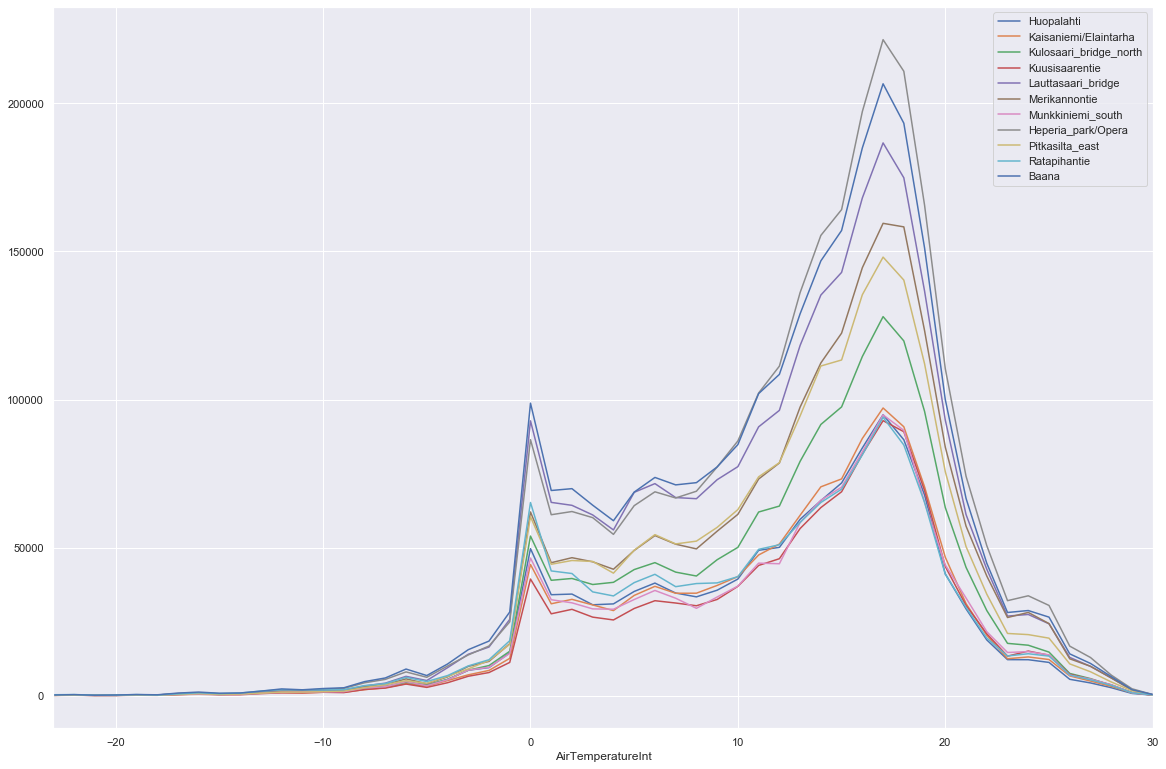

In [172]:
dfa = df.dropna(axis=0)
dfa['AirTemperatureInt'] = dfa['AirTemperature(degC)'].astype(int)
TemperatureGroups = dfa.groupby('AirTemperatureInt').sum()
TemperatureGroups
TemperatureGroups.reset_index().plot(x='AirTemperatureInt', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge_north', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_south',
       'Heperia_park/Opera', 'Pitkasilta_east',
       'Ratapihantie', 'Baana']))


# Air Temperature impact std deviations

In [173]:
# stddeviations
TemperatureGroups_std = dfa.groupby('AirTemperatureInt').std()
TemperatureGroups_std = TemperatureGroups_std[['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge_north', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_south',
       'Heperia_park/Opera', 'Pitkasilta_east',
       'Ratapihantie', 'Baana']]
TemperatureGroups_std


,Huopalahti,Kaisaniemi/Elaintarha,Kulosaari_bridge_north,Kuusisaarentie,Lauttasaari_bridge,Merikannontie,Munkkiniemi_south,Heperia_park/Opera,Pitkasilta_east,Ratapihantie,Baana
AirTemperatureInt,,,,,,,,,,,
-23,9.794079,8.043377,11.605857,7.500487,11.498029,9.348672,7.589235,12.810814,5.714453,19.615902,16.389270
-22,12.517416,15.272758,11.262242,9.180725,16.198765,12.073978,11.089678,14.542876,9.357961,26.112394,22.096757
-21,5.832511,2.866737,9.200790,4.732864,8.958490,8.908627,5.099020,5.955899,5.749308,14.123481,8.066767
-20,7.964535,14.150972,7.763982,4.670779,11.081914,7.006824,4.802726,15.058709,6.316994,16.550058,17.888338
-19,12.197917,6.668803,10.906361,6.226723,12.374268,9.434132,10.067012,13.437414,8.290316,18.081723,19.322794
-18,9.508889,5.067528,7.643230,4.953539,11.315630,6.838625,6.936756,10.061668,6.529047,8.867492,13.857833
-17,12.395878,7.882757,12.034948,10.972564,15.301564,13.891152,11.704927,18.714529,9.418463,13.972554,21.699062
-16,13.213875,11.644909,12.274088,10.382662,18.316517,12.543418,11.475652,19.640858,12.296130,21.803342,26.123955
-15,10.019393,11.503171,10.502678,8.899862,11.818137,12.036893,10.946830,13.008650,7.684924,14.026851,19.785240


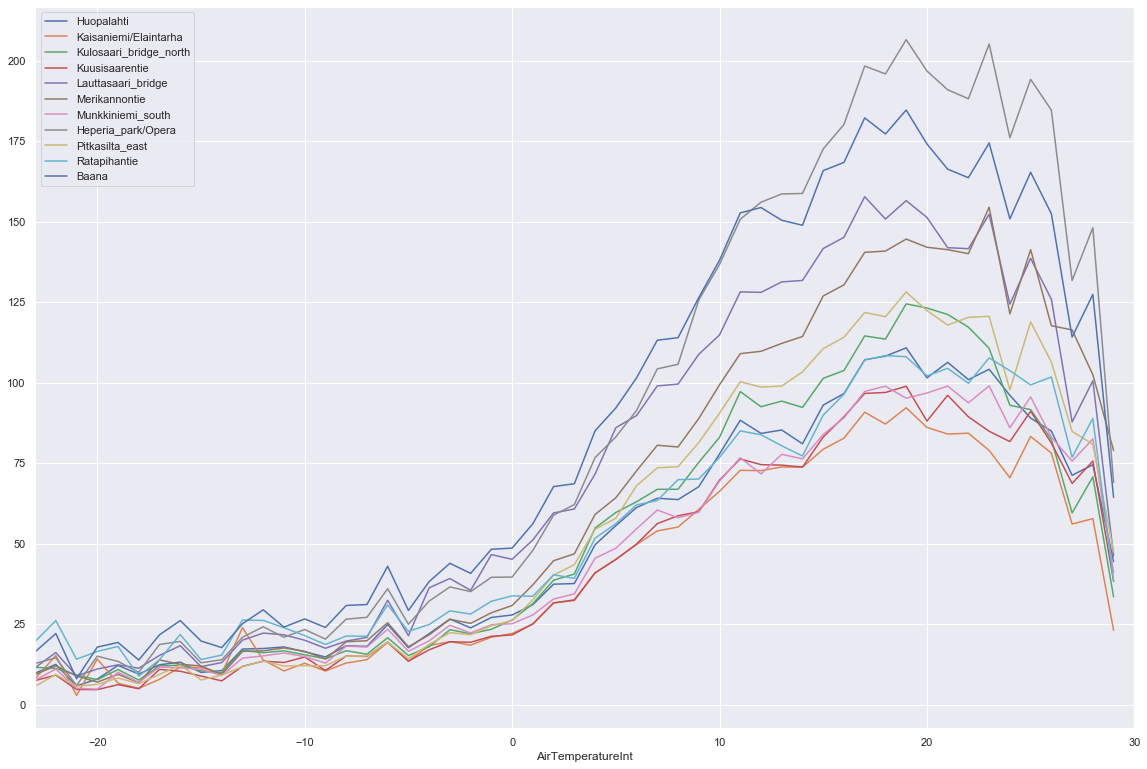

In [174]:
TemperatureGroups = dfa.groupby('AirTemperatureInt').std()
TemperatureGroups
TemperatureGroups.reset_index().plot(x='AirTemperatureInt', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge_north', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_south',
       'Heperia_park/Opera', 'Pitkasilta_east',
       'Ratapihantie', 'Baana']))


# 6. Impact of weekday - Weekday data to be corrected! TO BE SORTED

In [175]:
weekdaygroup = df.groupby('Weekday').sum()
weekdaygroup

,RelativeHumidity(%),AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg),Huopalahti,Kaisaniemi/Elaintarha,Kulosaari_bridge_north,Kuusisaarentie,Lauttasaari_bridge,Merikannontie,Munkkiniemi_south,Heperia_park/Opera,Pitkasilta_east,Ratapihantie,Baana
Weekday,,,,,,,,,,,,,,,,
Fri,298797.0,25696.4,6199.0,12800.6,776026.0,178118.0,181119.0,222393.0,160880.0,345718.0,273604.0,173422.0,383635.0,278654.0,191757.0,388882.0
Mon,297393.0,25750.1,5763.0,13165.1,726577.0,234780.0,219057.0,280935.0,211656.0,404844.0,340981.0,220463.0,463114.0,317568.0,247867.0,467321.0
Sat,294927.0,26876.0,5690.0,12902.8,778364.0,67071.0,99902.0,131750.0,82101.0,226087.0,178263.0,84098.0,227217.0,174609.0,77333.0,194448.0
Sun,298342.0,26228.3,5482.0,12670.8,749362.0,72762.0,95943.0,140802.0,99994.0,232493.0,204753.0,91406.0,229020.0,154216.0,73142.0,199520.0
Thu,298215.0,25542.1,6257.0,13044.9,744414.0,212016.0,207382.0,256485.0,190224.0,391532.0,319105.0,203032.0,448131.0,314826.0,226975.0,450588.0
Tue,293294.0,25255.0,6395.0,13356.8,716581.0,237912.0,223528.0,288007.0,212431.0,414474.0,347887.0,223075.0,480790.0,330512.0,248887.0,478739.0
Wed,290488.0,25883.5,6552.0,13075.7,752217.0,236042.0,225400.0,287252.0,213629.0,426889.0,352125.0,223709.0,492065.0,338760.0,247957.0,484421.0


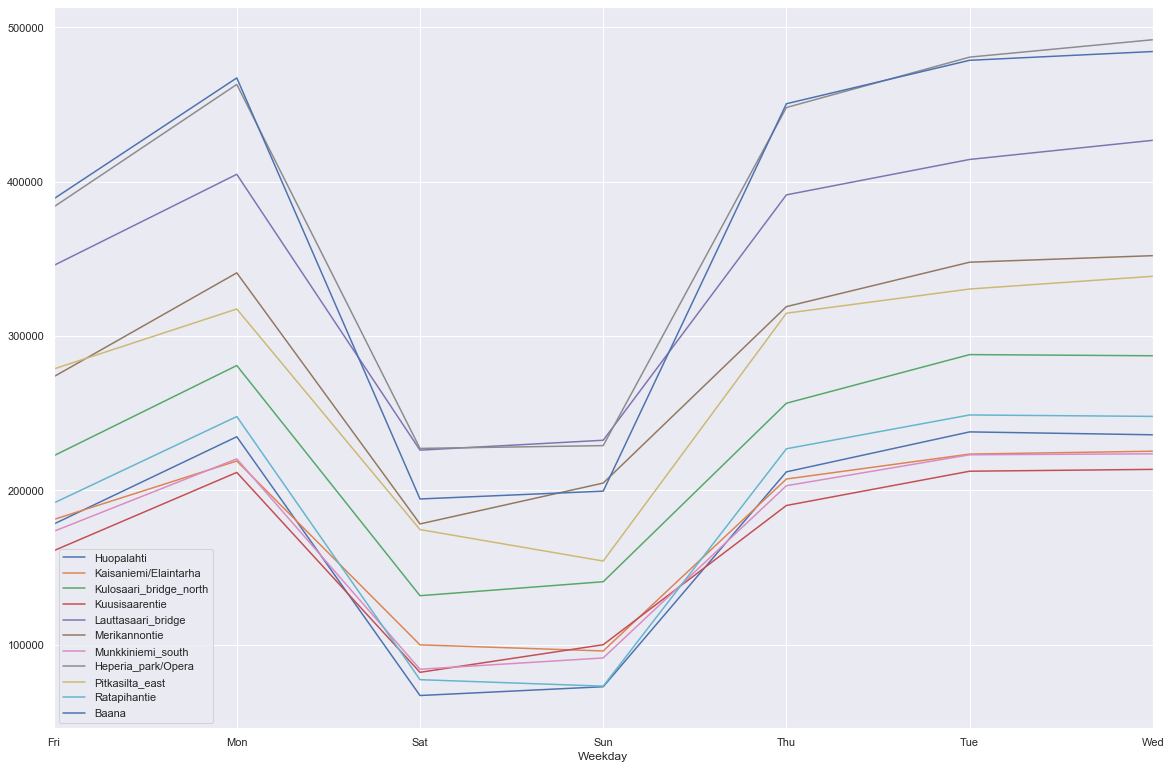

In [176]:
weekdaygroup.reset_index().plot(x='Weekday', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge_north', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_south',
       'Heperia_park/Opera', 'Pitkasilta_east',
       'Ratapihantie', 'Baana']))

# 7. Impact of snow depth

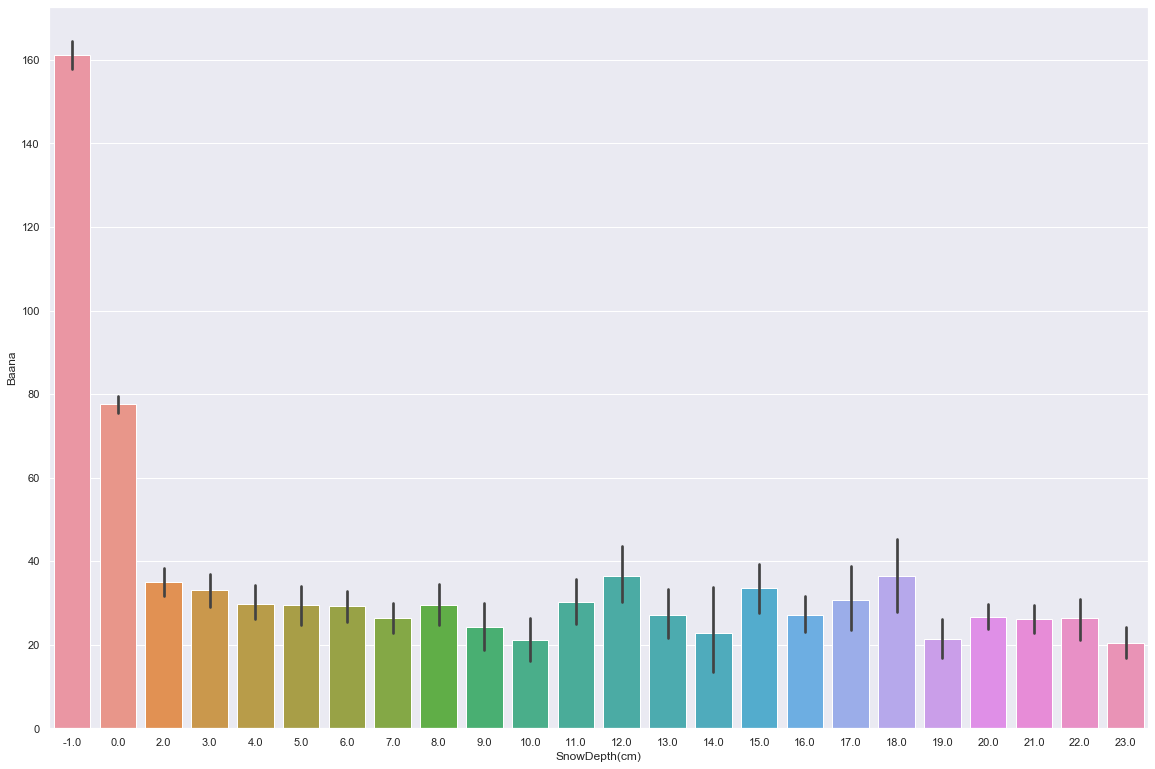

In [179]:
sns.barplot(x="SnowDepth(cm)", y="Baana", data=df)

# 8. Pairplots

C:\Users\seppo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\seppo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


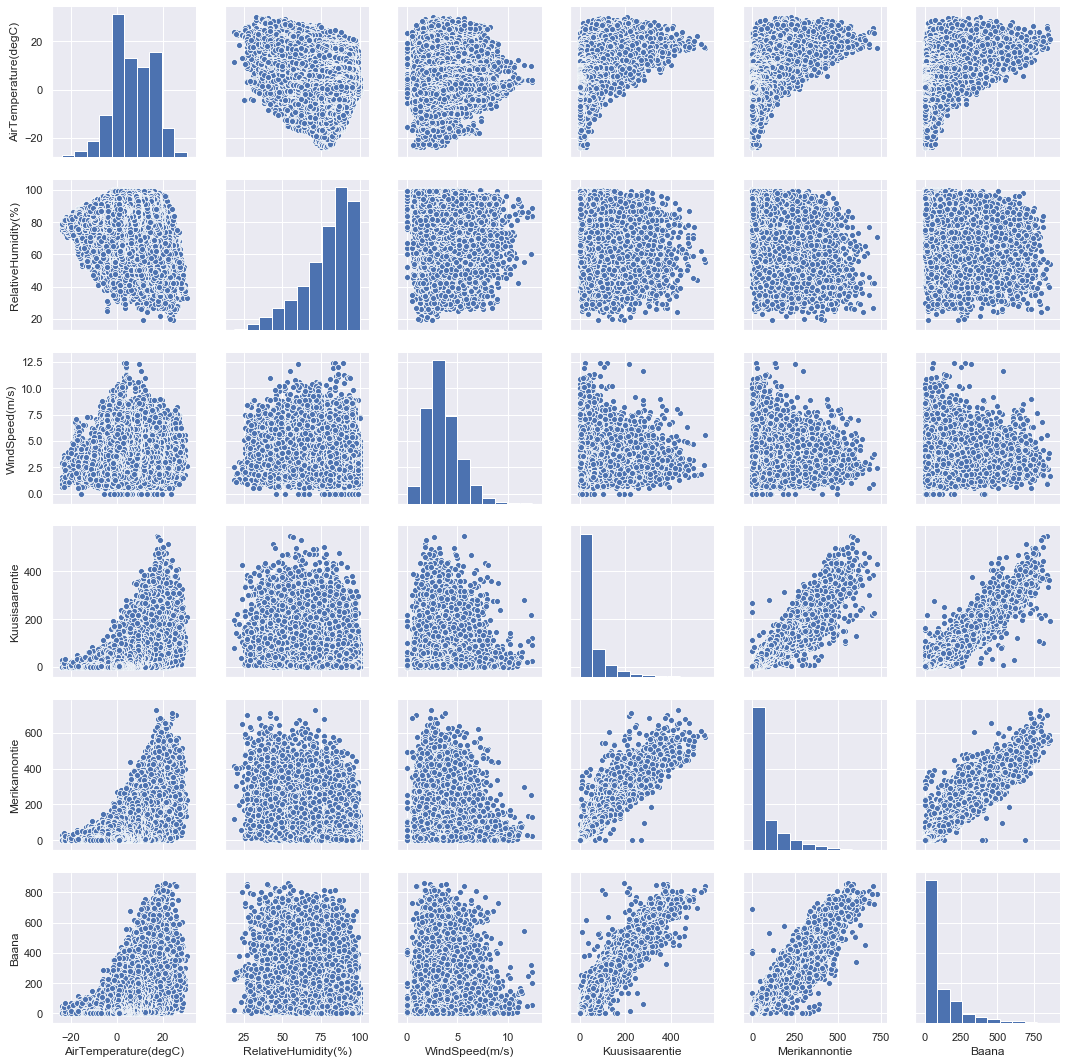

In [180]:
sns.pairplot(df, vars=['AirTemperature(degC)', 'RelativeHumidity(%)','WindSpeed(m/s)','Kuusisaarentie','Merikannontie','Baana'])

# Trying Clustering - No success yet

In [ ]:
sns.scatterplot(x="AirTemperatureInt", y="SnowDepth(cm)", data=dfa)

In [ ]:
from sklearn.cluster import KMeans

#X[['AirTemperature(degC)','SnowDepth(cm)']] = df[['AirTemperature(degC)','SnowDepth(cm)']]
X = dfa[['AirTemperature(degC)','SnowDepth(cm)']].to_numpy()


m, n = X.shape    # Get the number of data points m and number of features n

k = 5    # Define number of clusters to use

cluster_means = np.zeros((k,n))    # Store the resulting clustering means in the rows of this np array
cluster_labels = np.zeros(m)    # Store here the resulting cluster indices (one for each data point)

k_means = KMeans(n_clusters = k, max_iter = 10).fit(X)  # Apply k-means with k=3 cluster and using maximum 100 iterations
cluster_means = k_means.cluster_centers_    # Get cluster means (centers)
cluster_indices = k_means.labels_           # Get the cluster labels for each data point

# Plot the clustered data
sns.scatterplot(data=cluster_labels)

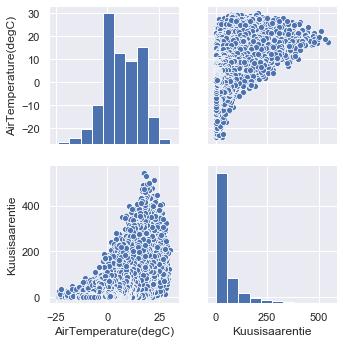

In [181]:
sns.pairplot(df, vars=["AirTemperature(degC)", "Kuusisaarentie"])

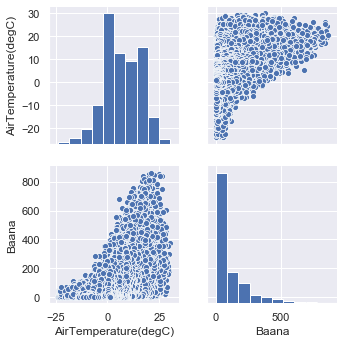

In [183]:
sns.pairplot(df, vars=["AirTemperature(degC)", "Baana"])

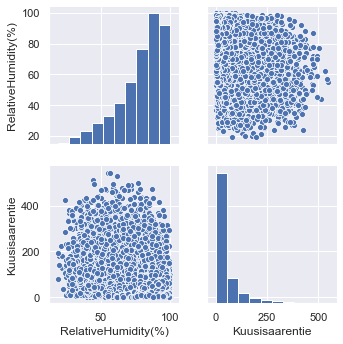

In [182]:
sns.pairplot(df, vars=["RelativeHumidity(%)", "Kuusisaarentie"])

In [ ]:
sns.pairplot(df, vars=['AirTemperature(degC)', 'RelativeHumidity(%)','WindSpeed(m/s)','Kuusisaarentie','Merikannontie','Baana'])